<a href="https://colab.research.google.com/github/EyaRIAHI-BE/Soft-Computing-Projects/blob/main/SVM_Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. **Code SVM avec noyau linéaire**

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import time

# Chargement et préparation des données
dataset = pd.read_csv('diabetes.csv')
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Modèle SVM linéaire
start = time.time()
model_linear = SVC(kernel='linear', probability=True, random_state=42)
model_linear.fit(X_train, y_train)
end = time.time()

# Prédictions
y_pred = model_linear.predict(X_test)
y_prob = model_linear.predict_proba(X_test)[:, 1]

# Calcul des métriques
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
complexity = end - start

print(f"Kernel: Linéaire\nAccuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}, Temps entraînement: {complexity:.3f}s\n")


Kernel: Linéaire
Accuracy: 0.749, Recall: 0.625, Precision: 0.641, F1-score: 0.633, AUC: 0.803, Temps entraînement: 0.096s



# 2. **Code SVM avec noyau RBF**

In [2]:
start = time.time()
model_rbf = SVC(kernel='rbf', probability=True, random_state=42)
model_rbf.fit(X_train, y_train)
end = time.time()

y_pred = model_rbf.predict(X_test)
y_prob = model_rbf.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
complexity = end - start

print(f"Kernel: RBF\nAccuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}, Temps entraînement: {complexity:.3f}s\n")


Kernel: RBF
Accuracy: 0.749, Recall: 0.600, Precision: 0.649, F1-score: 0.623, AUC: 0.798, Temps entraînement: 0.045s



### 3. **Code SVM avec noyau Sigmoïde**

In [3]:
start = time.time()
model_sigmoid = SVC(kernel='sigmoid', probability=True, random_state=42)
model_sigmoid.fit(X_train, y_train)
end = time.time()

y_pred = model_sigmoid.predict(X_test)
y_prob = model_sigmoid.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
complexity = end - start

print(f"Accuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}")


Accuracy: 0.675, Recall: 0.550, Precision: 0.530, F1-score: 0.540, AUC: 0.726


### 4. **Code SVM avec noyau Polynomial**

In [4]:
start = time.time()
model_poly = SVC(kernel='poly', degree=3, probability=True, random_state=42)
model_poly.fit(X_train, y_train)
end = time.time()

y_pred = model_poly.predict(X_test)
y_prob = model_poly.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
complexity = end - start

print(f"Kernel: Polynomial\nAccuracy: {accuracy:.3f}, Recall: {recall:.3f}, Precision: {precision:.3f}, F1-score: {f1:.3f}, AUC: {auc:.3f}, Temps entraînement: {complexity:.3f}s\n")


Kernel: Polynomial
Accuracy: 0.753, Recall: 0.475, Precision: 0.717, F1-score: 0.571, AUC: 0.776, Temps entraînement: 0.026s



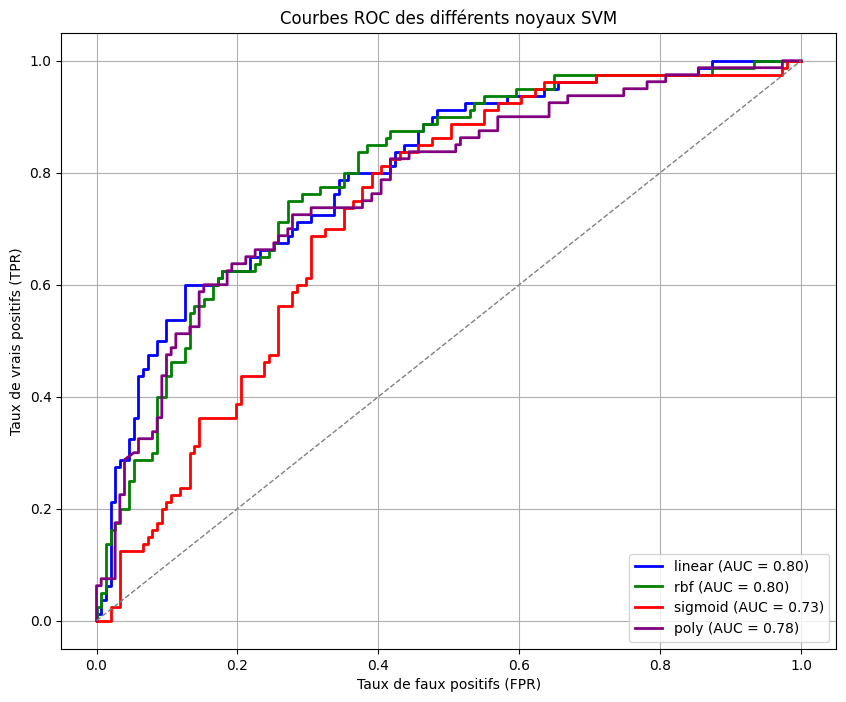

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Chargement et préparation des données
dataset = pd.read_csv('diabetes.csv')
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Liste des noyaux
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(10, 8))

for kernel, color in zip(kernels, colors):
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    fpr, tpr, _ = roc_curve(y_test, y_prob)
    auc = roc_auc_score(y_test, y_prob)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'{kernel} (AUC = {auc:.2f})')

# Ligne diagonale pour référence (classifieur aléatoire)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

plt.title('Courbes ROC des différents noyaux SVM')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Outcome
0    500
1    268
Name: count, dtype: int64


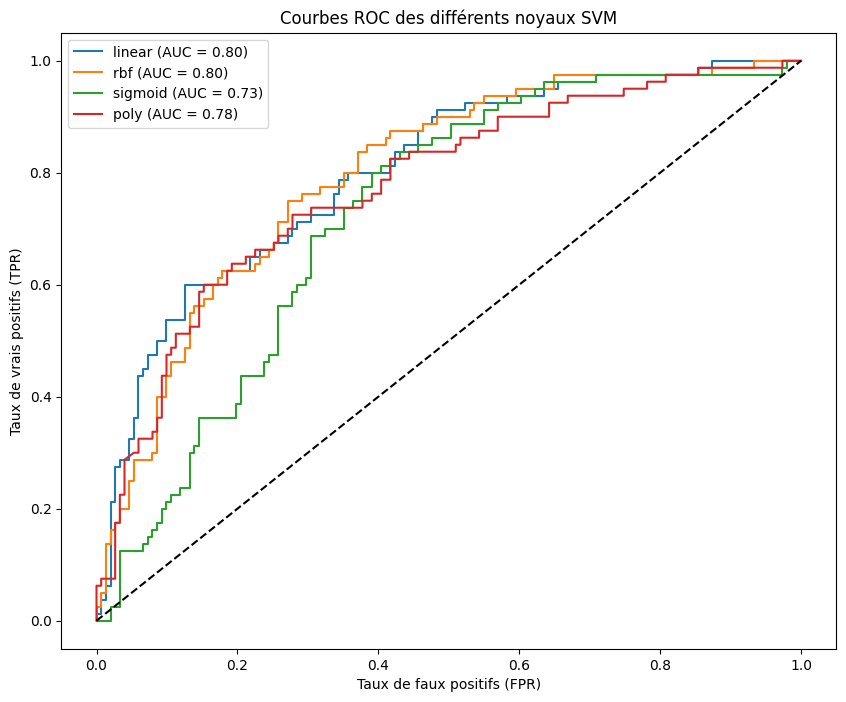

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import time

# Chargement du jeu de données
dataset = pd.read_csv('diabetes.csv')

# Analyse de la distribution des classes (Réponse question 4)
print(dataset['Outcome'].value_counts())

# Préparation des données
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']

# Normalisation des variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division en ensemble entraînement et test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Noyaux SVM à tester
kernels = ['linear', 'rbf', 'sigmoid', 'poly']

# Initialisation du tableau des résultats
results = []

plt.figure(figsize=(10, 8))

for kernel in kernels:
    # Mesurer le temps d'entraînement (complexité)
    start = time.time()
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train, y_train)
    end = time.time()
    complexity = end - start

    # Prédictions et probabilités
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Calcul des métriques
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    # Sauvegarde des résultats
    results.append({
        'Kernel': kernel,
        'Accuracy': accuracy,
        'Recall': recall,
        'Precision': precision,
        'F1-score': f1,
        'AUC': auc,
        'Complexity (s)': complexity
    })

    # Courbes ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{kernel} (AUC = {auc:.2f})')

# Affichage graphique des courbes ROC
plt.plot([0, 1], [0, 1], 'k--')  # ligne diagonale
plt.title('Courbes ROC des différents noyaux SVM')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend()
plt.show()


### **Partie 2**

In [7]:
dataset_selected1 = dataset.loc[dataset['Outcome'].isin([1])]


In [8]:
dataset_selected0 = dataset.loc[dataset['Outcome'] == 0]

In [9]:
# Pour classe 1
Label1 = dataset_selected1['Outcome']
Data1 = dataset_selected1.drop('Outcome', axis=1)

# Pour classe 0
Label0 = dataset_selected0['Outcome']
Data0 = dataset_selected0.drop('Outcome', axis=1)


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(Data0, test_size=1/3, random_state=42)


In [11]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import numpy as np
import time

dataset = pd.read_csv('diabetes.csv')
dataset_selected0 = dataset.loc[dataset['Outcome'] == 0]
X = dataset_selected0.drop('Outcome', axis=1)
y = dataset_selected0['Outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test = train_test_split(X_scaled, test_size=1/3, random_state=42)

X_full_scaled = scaler.transform(dataset.drop('Outcome', axis=1))
y_full = dataset['Outcome']

start = time.time()
model = OneClassSVM(kernel='linear', nu=0.1)
model.fit(X_train)
end = time.time()

y_pred = model.predict(X_full_scaled)
y_pred_labels = np.where(y_pred == 1, 0, 1)

accuracy = accuracy_score(y_full, y_pred_labels)
recall = recall_score(y_full, y_pred_labels)
precision = precision_score(y_full, y_pred_labels)
f1 = f1_score(y_full, y_pred_labels)
scores = model.score_samples(X_full_scaled)
auc = roc_auc_score(y_full, scores)
complexity = end - start

print(f"Kernel: Linéaire\nAccuracy: {accuracy:.3f}\nRecall: {recall:.3f}\nPrecision: {precision:.3f}\nF1-score: {f1:.3f}\nAUC: {auc:.3f}\nComplexité: {complexity:.3f}s")


Kernel: Linéaire
Accuracy: 0.535
Recall: 0.500
Precision: 0.375
F1-score: 0.429
AUC: 0.477
Complexité: 0.001s


In [12]:


start = time.time()
model = OneClassSVM(kernel='rbf', nu=0.1)
model.fit(X_train)
end = time.time()

y_pred = model.predict(X_full_scaled)
y_pred_labels = np.where(y_pred == 1, 0, 1)

accuracy = accuracy_score(y_full, y_pred_labels)
recall = recall_score(y_full, y_pred_labels)
precision = precision_score(y_full, y_pred_labels)
f1 = f1_score(y_full, y_pred_labels)
scores = model.score_samples(X_full_scaled)
auc = roc_auc_score(y_full, scores)
complexity = end - start

print(f"Kernel: RBF\nAccuracy: {accuracy:.3f}\nRecall: {recall:.3f}\nPrecision: {precision:.3f}\nF1-score: {f1:.3f}\nAUC: {auc:.3f}\nComplexité: {complexity:.3f}s")


Kernel: RBF
Accuracy: 0.698
Recall: 0.343
Precision: 0.622
F1-score: 0.442
AUC: 0.371
Complexité: 0.002s


In [13]:
start = time.time()
model = OneClassSVM(kernel='sigmoid', nu=0.1)
model.fit(X_train)
end = time.time()

y_pred = model.predict(X_full_scaled)
y_pred_labels = np.where(y_pred == 1, 0, 1)

accuracy = accuracy_score(y_full, y_pred_labels)
recall = recall_score(y_full, y_pred_labels)
precision = precision_score(y_full, y_pred_labels)
f1 = f1_score(y_full, y_pred_labels)
scores = model.score_samples(X_full_scaled)
auc = roc_auc_score(y_full, scores)
complexity = end - start

print(f"Kernel: Sigmoïde\nAccuracy: {accuracy:.3f}\nRecall: {recall:.3f}\nPrecision: {precision:.3f}\nF1-score: {f1:.3f}\nAUC: {auc:.3f}\nComplexité: {complexity:.3f}s")


Kernel: Sigmoïde
Accuracy: 0.621
Recall: 0.104
Precision: 0.354
F1-score: 0.161
AUC: 0.514
Complexité: 0.003s


In [14]:

start = time.time()
model = OneClassSVM(kernel='poly', nu=0.1)
model.fit(X_train)
end = time.time()

y_pred = model.predict(X_full_scaled)
y_pred_labels = np.where(y_pred == 1, 0, 1)

accuracy = accuracy_score(y_full, y_pred_labels)
recall = recall_score(y_full, y_pred_labels)
precision = precision_score(y_full, y_pred_labels)
f1 = f1_score(y_full, y_pred_labels)
scores = model.score_samples(X_full_scaled)
auc = roc_auc_score(y_full, scores)
complexity = end - start

print(f"Kernel: Polynomial\nAccuracy: {accuracy:.3f}\nRecall: {recall:.3f}\nPrecision: {precision:.3f}\nF1-score: {f1:.3f}\nAUC: {auc:.3f}\nComplexité: {complexity:.3f}s")


Kernel: Polynomial
Accuracy: 0.592
Recall: 0.306
Precision: 0.392
F1-score: 0.344
AUC: 0.535
Complexité: 0.007s


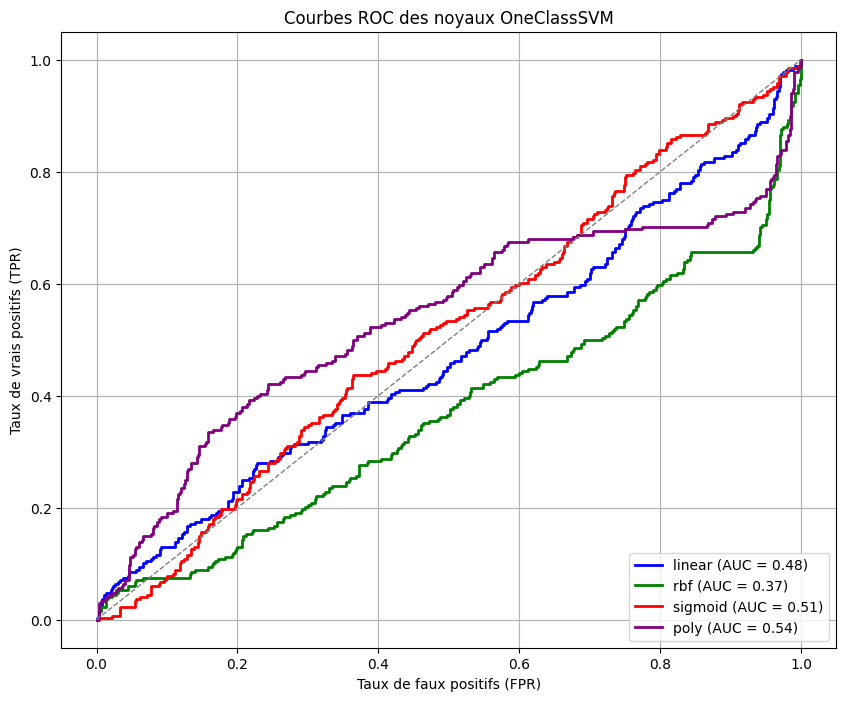

In [15]:
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# Chargement et préparation des données
dataset = pd.read_csv('diabetes.csv')
dataset_selected0 = dataset.loc[dataset['Outcome'] == 0]

X_train_full = dataset_selected0.drop('Outcome', axis=1)
y_train_full = dataset_selected0['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_full)

# Division train/test pour entraînement
X_train, X_test = train_test_split(X_scaled, test_size=1/3, random_state=42)

# Préparation de tout le dataset pour test
X_full_scaled = scaler.transform(dataset.drop('Outcome', axis=1))
y_true = dataset['Outcome']

kernels = ['linear', 'rbf', 'sigmoid', 'poly']
colors = ['blue', 'green', 'red', 'purple']

plt.figure(figsize=(10, 8))

for kernel, color in zip(kernels, colors):
    model = OneClassSVM(kernel=kernel, nu=0.1)
    model.fit(X_train)

    # Prédiction score continu pour ROC
    scores = model.score_samples(X_full_scaled)
    fpr, tpr, _ = roc_curve(y_true, scores)
    auc = roc_auc_score(y_true, scores)

    plt.plot(fpr, tpr, color=color, lw=2, label=f'{kernel} (AUC = {auc:.2f})')

# Ligne diagonale référence (hasard)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

plt.title('Courbes ROC des noyaux OneClassSVM')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [16]:
!pip install imbalanced-learn scikit-learn pandas -q
import pandas as pd
import numpy as np
import os
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score
# 1. CHARGEMENT diabets.csv
if os.path.exists('diabets.csv'):
    dataset = pd.read_csv('diabets.csv')
    print(" diabets.csv chargé !")
# 2. SMOTE
X = dataset.drop('Outcome', axis=1)
y = dataset['Outcome']
smote = SMOTE(random_state=42, k_neighbors=5)
X_smote, y_smote = smote.fit_resample(X, y)
print(" APRÈS SMOTE :")
print(pd.Series(y_smote).value_counts())
# 3. SAUVEGARDE dataset_smote.csv
dataset_smote = pd.DataFrame(X_smote, columns=X.columns)
dataset_smote['Outcome'] = y_smote
dataset_smote.to_csv('dataset_smote.csv', index=False)
print("\n dataset_smote.csv créé !")
# 4. COMPARAISON SVM
print("\n ÉVALUATION SVM (SANS / AVEC SMOTE)")
kernels = ['linear', 'rbf']
results = {}
for smote_used, data_name in [(False, "SANS SMOTE"), (True, "AVEC SMOTE")]:
    if smote_used:
        X_use, y_use = X_smote, y_smote
    else:
        X_use, y_use = X, y
    X_train, X_test, y_train, y_test = train_test_split(X_use, y_use, test_size=0.3, random_state=42)
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train)
    X_test_s = scaler.transform(X_test)
    print(f"\n{data_name}:")
    for kernel in kernels:
        model = SVC(kernel=kernel, probability=True, random_state=42)
        model.fit(X_train_s, y_train)
        y_pred = model.predict(X_test_s)
        y_proba = model.predict_proba(X_test_s)[:, 1]
        acc = accuracy_score(y_test, y_pred)
        auc = roc_auc_score(y_test, y_proba)
        results[f"{data_name}_{kernel}"] = (acc, auc)
        print(f"  {kernel}: Accuracy={acc:.3f}, AUC={auc:.3f}")

 APRÈS SMOTE :
Outcome
1    500
0    500
Name: count, dtype: int64

 dataset_smote.csv créé !

 ÉVALUATION SVM (SANS / AVEC SMOTE)

SANS SMOTE:
  linear: Accuracy=0.749, AUC=0.803
  rbf: Accuracy=0.745, AUC=0.797

AVEC SMOTE:
  linear: Accuracy=0.743, AUC=0.841
  rbf: Accuracy=0.763, AUC=0.840


Chargement dataset_smote.csv...
 Dataset équilibré : 1000 lignes
 Distribution : {1: 500, 0: 500}
Colonnes : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

 Train: 700, Test: 300

 ENTRAÎNEMENT SVM (dataset équilibré) :

LINEAR:
  Accuracy: 0.747
  AUC-ROC:  0.854
  Rapport :
              precision    recall  f1-score   support

           0       0.72      0.81      0.76       150
           1       0.78      0.69      0.73       150

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300


RBF:
  Accuracy: 0.793
  AUC-ROC:  0.876
  Rapport :
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       150
           1       0.78      0.81      0.80       150

    accuracy                           0.79       300
   macro avg       0.79      0.79      0.79  

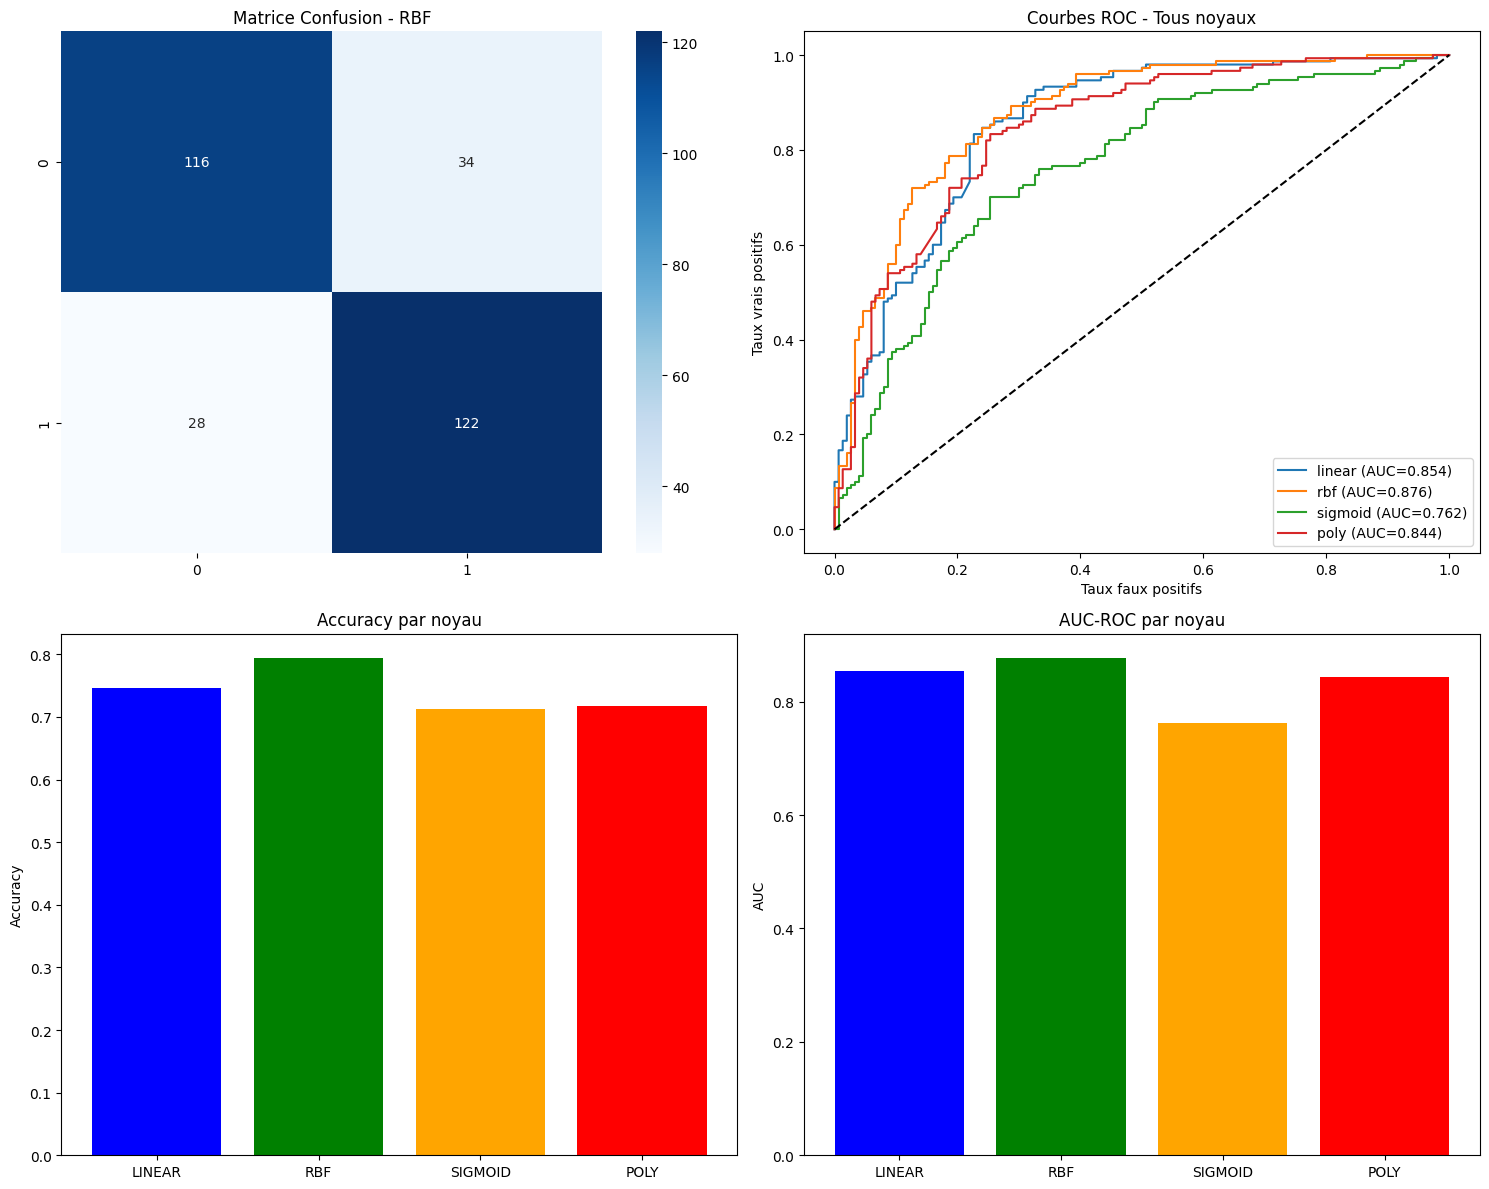

In [17]:
# Installation
!pip install imblearn scikit-learn matplotlib seaborn -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix)
import seaborn as sns
# 1. CHARGEMENT dataset_smote.csv
print("Chargement dataset_smote.csv...")
dataset_smote = pd.read_csv('dataset_smote.csv')
print(f" Dataset équilibré : {dataset_smote.shape[0]} lignes")
print(" Distribution :", dataset_smote['Outcome'].value_counts().to_dict())
print("Colonnes :", dataset_smote.columns.tolist())

# 2. PRÉPARATION DONNÉES
X = dataset_smote.drop('Outcome', axis=1)
y = dataset_smote['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n Train: {X_train_scaled.shape[0]}, Test: {X_test_scaled.shape[0]}\n")

# 3. ENTRAÎNEMENT 4 NOYAUX SVM
kernels = ['linear', 'rbf', 'sigmoid', 'poly']
results = {}

print(" ENTRAÎNEMENT SVM (dataset équilibré) :")
for kernel in kernels:
    print(f"\n{kernel.upper()}:")
    model = SVC(kernel=kernel, probability=True, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Prédictions
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Métriques
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)

    results[kernel] = {'accuracy': acc, 'auc': auc, 'model': model}
    print(f"  Accuracy: {acc:.3f}")
    print(f"  AUC-ROC:  {auc:.3f}")
    print(f"  Rapport :\n{classification_report(y_test, y_pred)}")

# 4. MEILLEUR MODÈLE
best_kernel = max(results, key=lambda k: results[k]['accuracy'])
print(f"\n MEILLEUR NOYAU : {best_kernel.upper()}")
print(f"   Accuracy: {results[best_kernel]['accuracy']:.3f}")
print(f"   AUC-ROC:  {results[best_kernel]['auc']:.3f}")

# 5. VISUALISATIONS
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Matrice de confusion (meilleur modèle)
cm = confusion_matrix(y_test, results[best_kernel]['model'].predict(X_test_scaled))
sns.heatmap(cm, annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
axes[0,0].set_title(f'Matrice Confusion - {best_kernel.upper()}')

# Courbes ROC tous noyaux
for i, kernel in enumerate(kernels):
    fpr, tpr, _ = roc_curve(y_test, results[kernel]['model'].predict_proba(X_test_scaled)[:,1])
    axes[0,1].plot(fpr, tpr, label=f'{kernel} (AUC={results[kernel]["auc"]:.3f})')
axes[0,1].plot([0,1],[0,1], 'k--')
axes[0,1].set_xlabel('Taux faux positifs')
axes[0,1].set_ylabel('Taux vrais positifs')
axes[0,1].set_title('Courbes ROC - Tous noyaux')
axes[0,1].legend()

# Comparaison Accuracy
kernels_names = [k.upper() for k in kernels]
acc_values = [results[k]['accuracy'] for k in kernels]
axes[1,0].bar(kernels_names, acc_values, color=['blue','green','orange','red'])
axes[1,0].set_title('Accuracy par noyau')
axes[1,0].set_ylabel('Accuracy')

# Comparaison AUC
auc_values = [results[k]['auc'] for k in kernels]
axes[1,1].bar(kernels_names, auc_values, color=['blue','green','orange','red'])
axes[1,1].set_title('AUC-ROC par noyau')
axes[1,1].set_ylabel('AUC')
plt.tight_layout()
plt.show()


## Courbes ROC – Classification Binaire


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


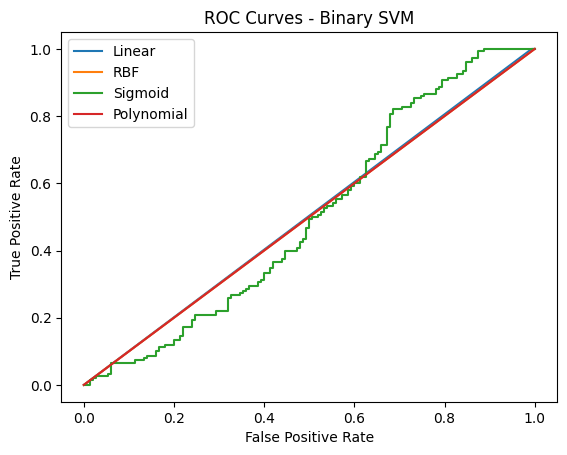

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

plt.figure()

for model,name in [(model_linear,'Linear'),(model_rbf,'RBF'),(model_sigmoid,'Sigmoid'),(model_poly,'Polynomial')]:
    y_prob = model.predict_proba(X_test)[:,1]
    fpr,tpr,_ = roc_curve(y_test,y_prob)
    plt.plot(fpr,tpr,label=name)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Binary SVM')
plt.legend()
plt.show()


# Classification Mono-classe (One-Class SVM)


In [19]:
from sklearn.svm import OneClassSVM

# Sélection classe 1
dataset_selected1 = dataset.loc[dataset['Outcome'].isin([1])]
dataset_selected0 = dataset.loc[dataset['Outcome'].isin([0])]

Data1 = dataset_selected1.drop('Outcome',axis=1)
Label1 = dataset_selected1['Outcome']

Data0 = dataset_selected0.drop('Outcome',axis=1)
Label0 = dataset_selected0['Outcome']

# Normalisation
scaler = StandardScaler()
Data1_scaled = scaler.fit_transform(Data1)
Data0_scaled = scaler.transform(Data0)

# Train uniquement sur classe 1
X_train_oc,X_test_oc = train_test_split(Data1_scaled,test_size=0.33,random_state=42)

kernels = ['linear','rbf','sigmoid','poly']

for k in kernels:
    model_oc = OneClassSVM(kernel=k)
    start = time.time()
    model_oc.fit(X_train_oc)
    end = time.time()

    pred_pos = model_oc.predict(X_test_oc)
    pred_neg = model_oc.predict(Data0_scaled)

    y_true = np.concatenate([np.ones(len(pred_pos)), -np.ones(len(pred_neg))])
    y_pred = np.concatenate([pred_pos, pred_neg])

    acc = accuracy_score(y_true,y_pred)
    rec = recall_score(y_true,y_pred,pos_label=1)
    prec = precision_score(y_true,y_pred,pos_label=1)
    f1 = f1_score(y_true,y_pred,pos_label=1)

    print(f'Kernel: {k} | Accuracy: {acc:.3f} | Recall: {rec:.3f} | Precision: {prec:.3f} | F1: {f1:.3f} | Time: {(end-start):.3f}s')


Kernel: linear | Accuracy: 0.801 | Recall: 0.225 | Precision: 0.294 | F1: 0.255 | Time: 0.006s
Kernel: rbf | Accuracy: 0.660 | Recall: 0.562 | Precision: 0.237 | F1: 0.333 | Time: 0.002s
Kernel: sigmoid | Accuracy: 0.584 | Recall: 0.506 | Precision: 0.183 | F1: 0.269 | Time: 0.003s
Kernel: poly | Accuracy: 0.581 | Recall: 0.281 | Precision: 0.120 | F1: 0.168 | Time: 0.002s


# Gestion du déséquilibre avec SMOTE


In [20]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_res,y_res = sm.fit_resample(X,y)

print('Distribution après SMOTE:')
print(pd.Series(y_res).value_counts())


Distribution après SMOTE:
Outcome
1    500
0    500
Name: count, dtype: int64


## Conclusion
- SVM RBF donne généralement la meilleure AUC.
- One-Class est utile lorsque seule la classe malade est disponible.
- SMOTE améliore Recall sur données déséquilibrées.
